## 6.4 Supervised Machine Learning
### The script contains the following 
### 1. Importing libraries and datasets
### 2. Data Cleaning
### 3. Data preparation for regression analysis 
### 4. Regression Analysis 

### 1. Importing libraries and data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [9]:
#set path
path = '/Users/mohammedRusso/Documents/DATA_ANALYST_COURSE/DATA_Immersion_Submissions/Assingment 6/04-2025 Billionaire Statistics'

In [294]:
# load dataset
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Billionaires Statistics_cleaned.csv'))

### 2. Data Cleaning

In [14]:
df.columns

Index(['Unnamed: 0', 'Rank', 'NetWorth($B)', 'Age', 'Country', 'City',
       'Industries', 'Self Made', 'Gender', 'Last Name', 'First Name',
       'Birth Year', 'CPI Index', 'CPI Change', 'Country GDP',
       'Country tertiary education enrollment',
       'Country primary education enrollment', 'Country life expectancy',
       'Population of country'],
      dtype='object')

In [296]:
# drop column
df = df.drop('Unnamed: 0', axis=1)

In [308]:
df.head(10)

,Rank,NetWorth($B),Age,Country,City,Industries,Self Made,Gender,Last Name,First Name,Birth Year,CPI Index,CPI Change,Country GDP,Country tertiary education enrollment,Country primary education enrollment,Country life expectancy,Population of country
0,1,211.0,74,France,Paris,Fashion & Retail,False,M,Arnault,Bernard,1949,110.05,1.1,2715520000000,65.6,102.50%,82.5,67059887
1,2,180.0,51,United States,Austin,Automotive,True,M,Musk,Elon,1971,117.24,7.5,21427700000000,88.2,101.80%,78.5,328239523
2,3,114.0,59,United States,Medina,Technology,True,M,Bezos,Jeff,1964,117.24,7.5,21427700000000,88.2,101.80%,78.5,328239523
3,4,107.0,78,United States,Lanai,Technology,True,M,Ellison,Larry,1944,117.24,7.5,21427700000000,88.2,101.80%,78.5,328239523
4,5,106.0,92,United States,Omaha,Finance & Investments,True,M,Buffett,Warren,1930,117.24,7.5,21427700000000,88.2,101.80%,78.5,328239523
5,6,104.0,67,United States,Medina,Technology,True,M,Gates,Bill,1955,117.24,7.5,21427700000000,88.2,101.80%,78.5,328239523
6,7,94.5,81,United States,New York,Media & Entertainment,True,M,Bloomberg,Michael,1942,117.24,7.5,21427700000000,88.2,101.80%,78.5,328239523
7,8,93.0,83,Mexico,Mexico City,Telecom,True,M,Slim Helu,Carlos,1940,141.54,3.6,1258290000000,40.2,105.80%,75.0,126014024
8,9,83.4,65,India,Mumbai,Diversified,False,M,Ambani,Mukesh,1957,180.44,7.7,2611000000000,28.1,113.00%,69.4,1366417754
9,10,80.7,67,United States,Hunts Point,Technology,True,M,Ballmer,Steve,1956,117.24,7.5,21427700000000,88.2,101.80%,78.5,328239523


In [300]:
# Convert country gdp to int
df['Country GDP'] = df['Country GDP'].astype(int)

In [306]:
df['Country tertiary education enrollment'] = df['Country tertiary education enrollment'].astype('float') * 100

In [288]:
df['Country tertiary education enrollment'] = df['Country tertiary education enrollment'].apply(lambda x: f"{x:.000%}")

In [20]:
df.shape

(2476, 18)

In [28]:
# Check for missing values
df.isnull().sum()

Rank                                     0
NetWorth($B)                             0
Age                                      0
Country                                  0
City                                     0
Industries                               0
Self Made                                0
Gender                                   0
Last Name                                0
First Name                               0
Birth Year                               0
CPI Index                                0
CPI Change                               0
Country GDP                              0
Country tertiary education enrollment    0
Country primary education enrollment     0
Country life expectancy                  0
Population of country                    0
dtype: int64

In [30]:
# Check for duplicates
dups = df.duplicated()
dups.shape

(2476,)

/var/folders/d6/b55202qs51369fgxv1dvzry80000gn/T/ipykernel_67919/2991596451.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], bins=25) # Shows extreme values


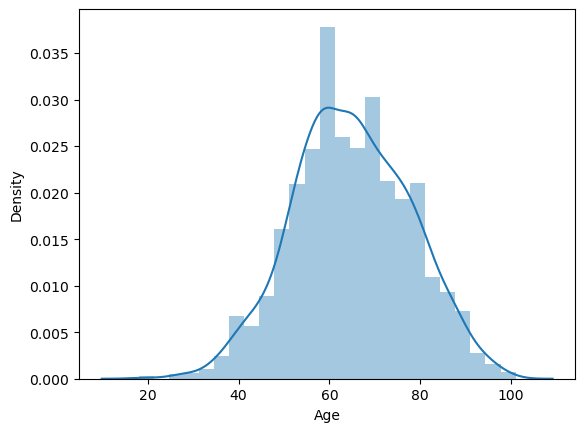

In [76]:
sns.distplot(df['Age'], bins=25) # Shows extreme values
plt.show()
# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [78]:
df['Age'].mean() # Check the mean

64.90670436187399

In [82]:
df['Age'].min() # Check the min

18

In [84]:
df['Age'].max() # Check max

101

In [86]:
df['Age'].median() # Check median

64.0

### 3. Data Prep for regression analysis

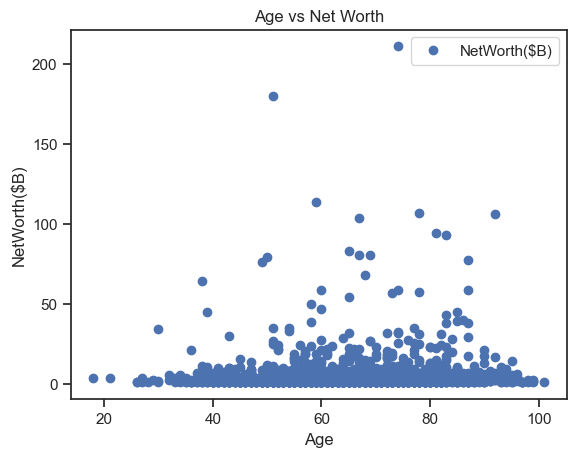

In [210]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Age', y='NetWorth($B)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Age vs Net Worth')  
plt.xlabel('Age')  
plt.ylabel('NetWorth($B)')  
plt.show()

##### The hypothisis of as age increases so does the Net Worth of the individual.

In [157]:
df_old_age = df[df['Age'] > 90]

In [163]:
df_old_age.shape

(51, 18)

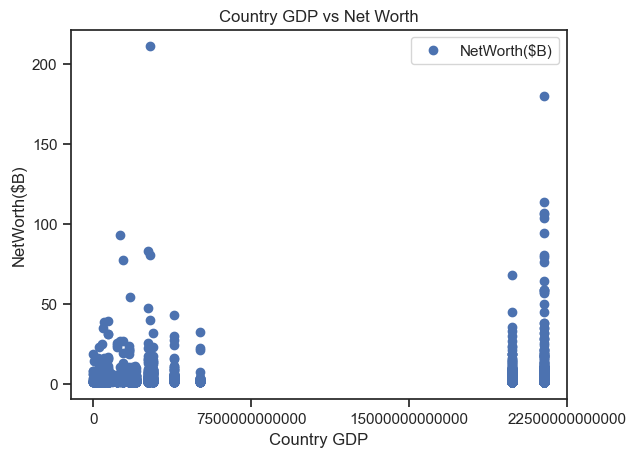

In [238]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Country GDP', y='NetWorth($B)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Country GDP vs Net Worth')  
plt.xlabel('Country GDP')  
plt.ylabel('NetWorth($B)')  
plt.xticks(np.arange(0,25000000000000,7500000000000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,25000000000000,7500000000000)])
plt.yticks(fontsize=11)
plt.show()

##### Hypotheis: The higher the coutries GDP the higher the individuals Net Worth

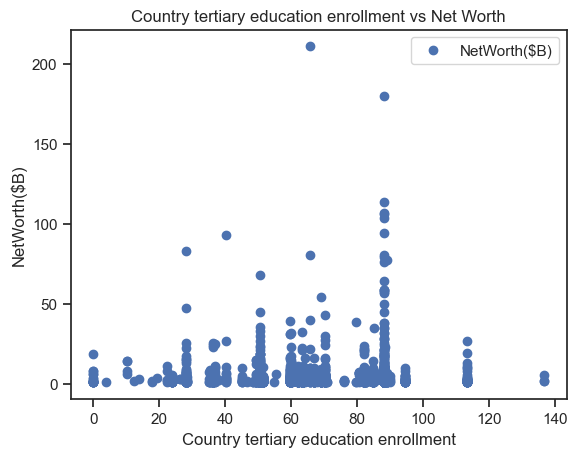

In [310]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Country tertiary education enrollment', y='NetWorth($B)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Country tertiary education enrollment vs Net Worth')  
plt.xlabel('Country tertiary education enrollment')  
plt.ylabel('NetWorth($B)')  

plt.show()

##### Higher percentage of countires tertiary education the higher the NetWorth

In [343]:
#created a filtered subset to better display the categorical plot
filtered_df = df[df['NetWorth($B)'] <=25]

In [345]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = filtered_df['Age'].values.reshape(-1,1)
y = filtered_df['NetWorth($B)'].values.reshape(-1,1)

In [347]:
X

array([[56],
       [52],
       [82],
       ...,
       [60],
       [71],
       [66]])

In [349]:
y

array([[24.6],
       [24.4],
       [24.2],
       ...,
       [ 1. ],
       [ 1. ],
       [ 1. ]])

In [351]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 4. Regression Analysis

In [353]:
# Create a regression object.

regression = LinearRegression() # This is the regression object, which will be fit onto the training set.

In [355]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [357]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

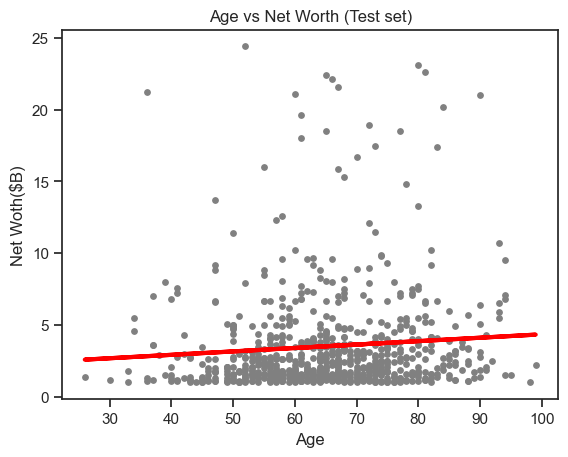

In [359]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age vs Net Worth (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Net Woth($B)')
plot_test.show()

##### **Regression Line**: The line has a slight upward slope, indicating a positive correlation between age and net wotrh. Although the slope is not steep, it suggests that as the number of age increases, the higher the net worth.

##### As the number of Age increases, there are still many billionaires, indicating that Age is not the only factor influencing Net Worth.

In [364]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X1 = filtered_df['Country tertiary education enrollment'].values.reshape(-1,1)
y1 = filtered_df['NetWorth($B)'].values.reshape(-1,1)

In [366]:
X1

array([[70.2],
       [88.2],
       [36.3],
       ...,
       [50.6],
       [50.6],
       [35.5]])

In [368]:
y1

array([[24.6],
       [24.4],
       [24.2],
       ...,
       [ 1. ],
       [ 1. ],
       [ 1. ]])

In [370]:
# Split data into a training set and a test set.

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [372]:
# Fit the regression object onto the training set.

regression.fit(X1_train, y1_train)

LinearRegression()

In [400]:
# Predict the values of y using X.
y1_predicted = regression.predict(X1_test)

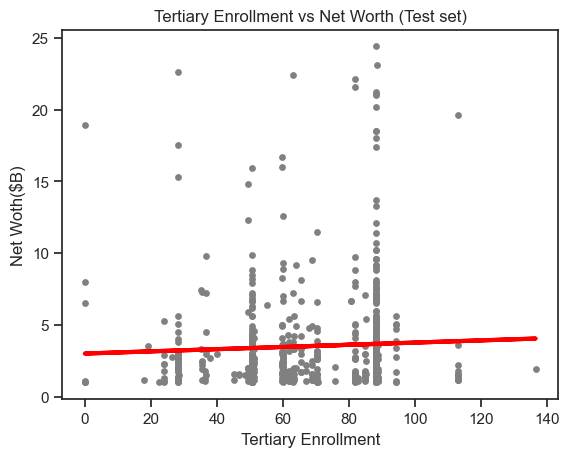

In [378]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X1_test, y1_test, color='gray', s = 15)
plot_test.plot(X1_test, y1_predicted, color='red', linewidth =3)
plot_test.title('Tertiary Enrollment vs Net Worth (Test set)')
plot_test.xlabel('Tertiary Enrollment')
plot_test.ylabel('Net Woth($B)')
plot_test.show()

In [380]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [382]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00764174]]
Mean squared error:  12.819821282067958
R2 score:  0.009214737088310554


In [384]:
y_predicted

array([[3.42362173],
       [4.01965869],
       [3.47130469],
       [3.68587799],
       [3.18520694],
       [3.54282912],
       [3.39978025],
       [3.97197574],
       [4.06734165],
       [3.82892686],
       [3.59051208],
       [3.35209729],
       [3.37593877],
       [3.92429278],
       [3.87660982],
       [4.18654904],
       [3.49514616],
       [3.5666706 ],
       [3.25673138],
       [3.75740243],
       [3.82892686],
       [3.16136546],
       [3.49514616],
       [3.51898764],
       [3.66203651],
       [3.35209729],
       [3.44746321],
       [3.28057286],
       [3.06599955],
       [3.39978025],
       [2.99447511],
       [3.18520694],
       [3.73356095],
       [3.16136546],
       [3.13752399],
       [3.87660982],
       [3.20904842],
       [3.97197574],
       [3.63819504],
       [3.63819504],
       [3.82892686],
       [4.11502461],
       [2.94679216],
       [3.5666706 ],
       [3.5666706 ],
       [3.47130469],
       [3.87660982],
       [3.304

In [386]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.8,3.423622
1,3.2,4.019659
2,4.0,3.471305
3,1.3,3.685878
4,1.0,3.185207
5,9.6,3.542829
6,1.4,3.399780
7,2.2,3.971976
8,2.5,4.067342
9,5.3,3.828927


In [390]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [392]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [394]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00764174]]
Mean squared error:  11.474470233124695
R2 score:  0.004507543548467718


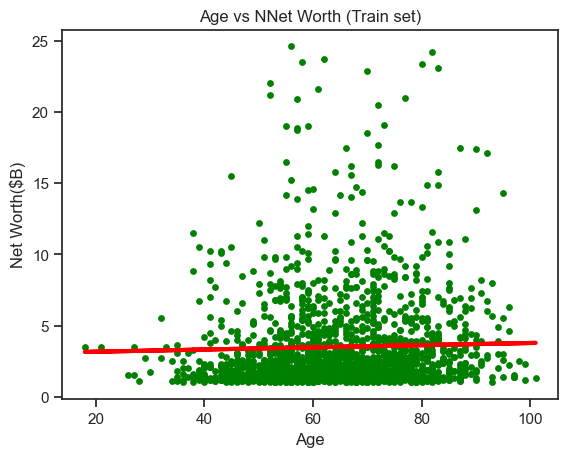

In [398]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Age vs NNet Worth (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('Net Worth($B)')
plot_test.show()

##### **Slope:**  The slope is the same in both models, indicating that for both, the rate of change in the dependent variable (Net Worth) concerning the independent variable (Age) is identical.

##### **Mean Squared Error (MSE):** the training are also identical

#### **R²:**  Score Even though both scores are quite low, suggesting that Age has very low impact on Net Worth.